In [1]:
import OOPAO
import tomoAO


import matplotlib.pyplot as plt
import numpy as np

from scipy.io import savemat, loadmat





     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAOmultiSource/OOPAO/tutorials/"
config_file = "config_keck.ini"

config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)


In [3]:
savemat(f'/home/joaomonteiro/Desktop/OOPAO/tutorials/Params.mat', config_vars)
params_path = f'/home/joaomonteiro/Desktop/OOPAO/tutorials/Params.mat'
with open(f'/home/joaomonteiro/Desktop/oomao/spaceODT_reconstruction_files/params_files/TestName.txt', "w") as file:
    file.write(params_path)

## Asterism

In [4]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [7.6,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              |  90.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [7.6,90]
-----------------------------------


-------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              | 180.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]     

## Telescope 


------------ Telescope -------------
Diameter [m]             |  13.50   
Resolution [px]          |   288    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    24    
Pixels in pupil          |  61552   
Field of view [arcsec]   |  20.00   
------------------------------------

OOPAO Warning: 
A new pupil is now considered, its reflectivity is considered to be uniform. Assign the proper reflectivity map to tel.pupilReflectivity if required.


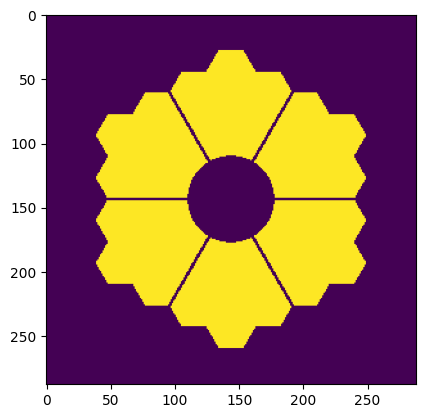

In [5]:
from OOPAO.Telescope import Telescope


sensing_wavelength  = lgsAst.src[0].wavelength           # sensing wavelength of the WFS, read from the ngs object
n_subaperture       = config_vars["nSubaperture"]        # number of subaperture across the diameter
diameter            = config_vars["diameter"]            # diameter of the support of the phase screens in [m]
resolution          = config_vars["resolution"]          # resolution of the phase screens in pixels
obs_ratio           = config_vars["centralObstruction"]  # central obstruction in fraction of the telescope diameter
sampling_time       = config_vars["samplingTime"]        # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"] # field of view of the telescope (arcsec)


tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)


pupil_data = loadmat(f'/home/joaomonteiro/Desktop/SpaceODT/ReconstructionTests/Data/Matrices/tel_pupil.mat')
pupil = pupil_data['pup'] 

tel.pupil = pupil

plt.imshow(tel.pupil)

## Atmosphere

In [6]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 src            = lgsAst,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)

Creation of layer1/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.02853107452392578 s
ZZt.. : 5.964205265045166 s
ZXt.. : 0.9024510383605957 s
XXt.. : 0.4369544982910156 s
Done!
Creation of layer2/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.04505181312561035 s
ZZt.. : 5.43229866027832 s
ZXt.. : 0.9333713054656982 s
XXt.. : 0.4503805637359619 s
Done!
Creation of layer3/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.029119253158569336 s
ZZt.. : 5.676324844360352 s
ZXt.. : 1.3642528057098389 s
XXt.. : 0.5561280250549316 s
Done!
Creation of layer4/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.07390689849853516 s
ZZt.. : 6.466032981872559 s
ZXt.. : 1.4010951519012451 s
XXt.. : 0.6908464431762695 s
Done!
Creation of layer5/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.06257200241088867 s
ZZt.. : 7.2759785652160645 s
ZXt.. : 1.4399149417877197 s
XXt.. : 0.711513996

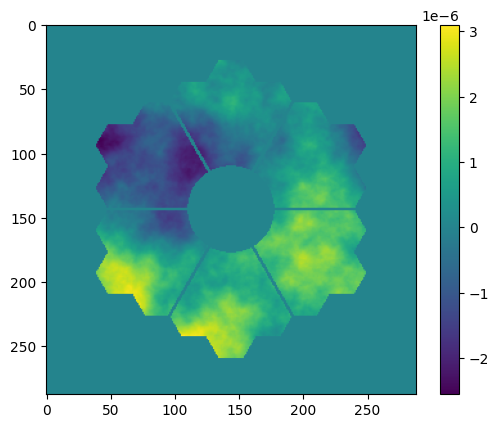

In [7]:
lgsAst**atm*tel

plt.imshow(lgsAst.OPD[0])
plt.colorbar()

## ShackHartmann WFS

In [8]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = False,
                      shannon_sampling   = True,
                      threshold_cog      = 0.01)


shwfs_geom = ShackHartmann(telescope     = tel,
                    nSubap             = n_subaperture,
                    lightRatio         = 0.5,
                    is_geometric       = True,
                    shannon_sampling   = True,
                    threshold_cog      = 0.01)



No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   288   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   24    
Subaperture Pitch [m]    |  0.56   
Subaperture FoV [arcsec] |  1.30   
Pixel Scale [arcsec]     |  0.108  
Valid Subapertures       |   456   
Spot Sampling [pix]      |  2.00   
Geometric WFS            |  False  
----------------------

In [9]:
unfiltered_subap_mask = np.loadtxt(config_vars["unfiltered_subap_mask"], dtype=bool, delimiter=",")
filtered_subap_mask = np.loadtxt(config_vars["filtered_subap_mask"], dtype=bool, delimiter=",")



shwfs.valid_subapertures = unfiltered_subap_mask.copy()
shwfs.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
shwfs.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()
shwfs.nValidSubaperture = np.count_nonzero(shwfs.valid_subapertures)

shwfs.filtered_subap_mask = filtered_subap_mask.copy()
shwfs.unfiltered_subap_mask = unfiltered_subap_mask.copy()

shwfs_geom.valid_subapertures = unfiltered_subap_mask.copy()
shwfs_geom.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
shwfs_geom.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()
shwfs_geom.nValidSubaperture = np.count_nonzero(shwfs_geom.valid_subapertures)

shwfs_geom.filtered_subap_mask = filtered_subap_mask.copy()
shwfs_geom.unfiltered_subap_mask = unfiltered_subap_mask.copy()


In [10]:
lgsAst**atm*tel*shwfs

lgsAst.print_optical_path()

NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann


## Deformable Mirror

In [11]:
from OOPAO.DeformableMirror import DeformableMirror
from OOPAO.MisRegistration import MisRegistration


mechanical_coupling = config_vars['mechanicalCoupling']
misReg = MisRegistration(config_vars)

unfiltered_act_mask = np.loadtxt(config_vars["actuator_mask"], dtype=bool, delimiter=",")
if unfiltered_act_mask.shape[0] != config_vars['nActuator']:
    unfiltered_act_mask = np.pad(unfiltered_act_mask, pad_width=int(config_vars['nSubapExtra']/2), mode='constant', constant_values=0)


X, Y = tomoAO.tools.tomography_tools.meshgrid(config_vars['nActuator'], tel.D, offset_x=0.0, offset_y=0.0, stretch_x=1, stretch_y=1)
coordinates = np.array([X[unfiltered_act_mask], Y[unfiltered_act_mask]]).T

dm = DeformableMirror(telescope=tel,
                            nSubap=config_vars['nSubaperture'],
                            mechCoupling=config_vars['mechanicalCoupling'],
                            misReg=misReg,
                            coordinates=coordinates,
                            pitch=tel.D / (config_vars['nActuator'] - 1))


dm.unfiltered_act_mask = unfiltered_act_mask.copy()


Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   349   
M4                       |  False  
Pitch [m]                |  0.56   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------



### AO System (tomoAO)


In [12]:
aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, dm=dm, atm=atm, wfs=shwfs)


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   349   
M4                       |  False  
Pitch [m]                |  0.56   
Mechnical coupling [%]   |   15    
== Misregistra

### Tomographic Reconstructor (tomoAO)


In [13]:
from tomoAO.Reconstruction.reconClassType import tomoReconstructor

rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2, 
                        order=config_vars["order"], indexation=config_vars["indexation"])


atm.r0 = 0.16


Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Building Gamma
Took 0.07037067413330078 seconds to build Gamma
Building the covariance matrices
Took 42.250328063964844 seconds to build the covariance matrices
Building the reconstructor
Took 2.9922990798950195 seconds to build the reconstructor
Updating the Atmosphere covariance matrices...


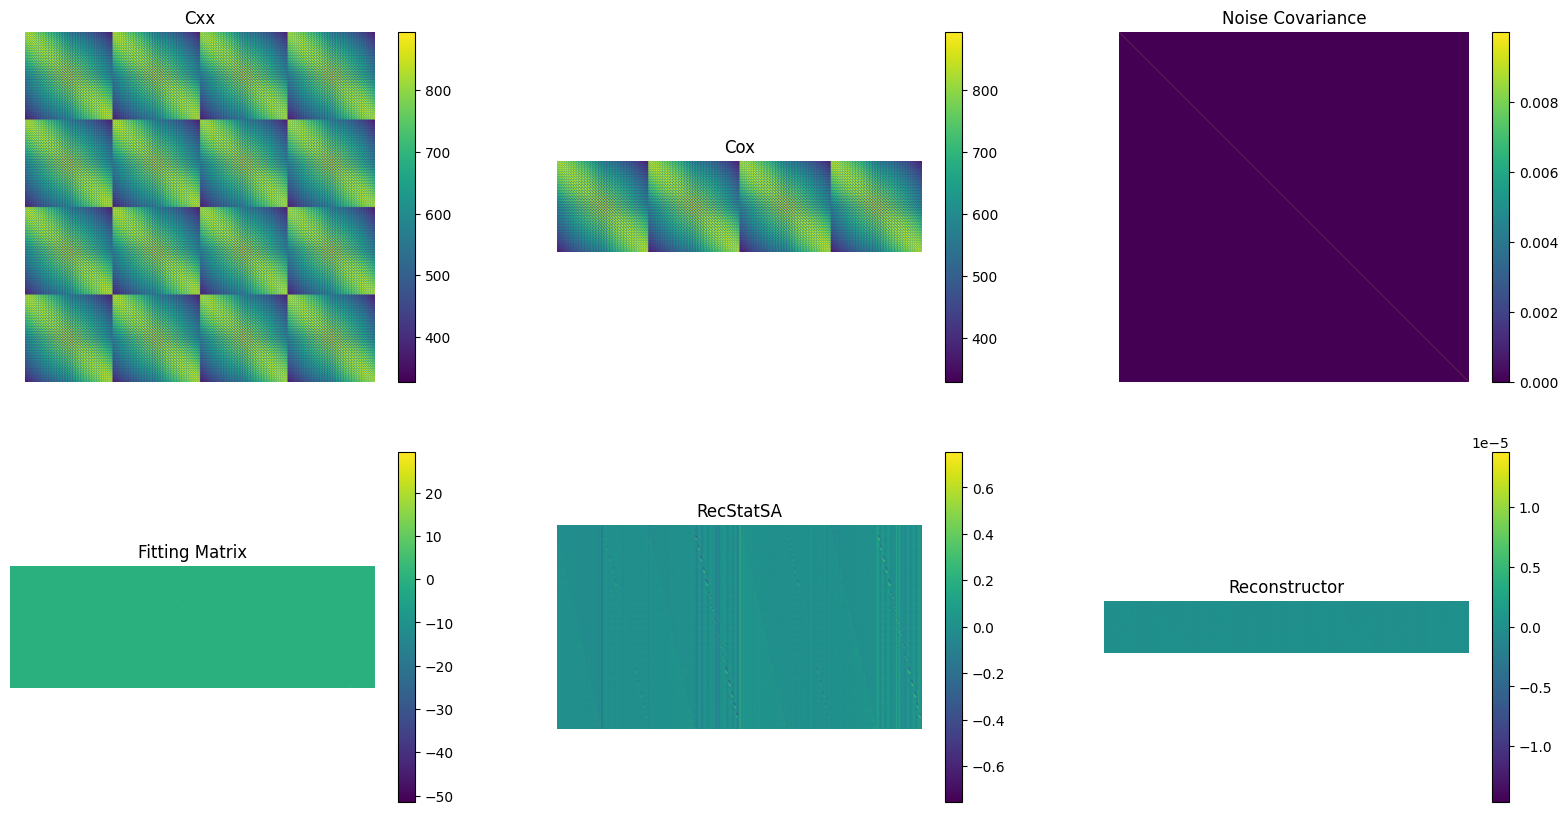

In [14]:
reconstructor = rec.reconstructor.copy()

RecStatSA = rec.RecStatSA[0]
fitting_matrix = rec.fittingMatrix
Cxx = rec.Cxx
Cox = rec.Cox[0]
Gamma = rec.Gamma
CnZ = rec.noise_covariance
weight_vector = rec.weight_vector

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

im = axes[0, 0].imshow(Cxx)
axes[0, 0].axis('off')
axes[0, 0].set_title(f'Cxx')
fig.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(Cox)
axes[0, 1].axis('off')
axes[0, 1].set_title(f'Cox')
fig.colorbar(im, ax=axes[0, 1])

im = axes[0, 2].imshow(CnZ)
axes[0, 2].axis('off')
axes[0, 2].set_title(f'Noise Covariance')
fig.colorbar(im, ax=axes[0, 2])


im = axes[1, 0].imshow(fitting_matrix)
axes[1, 0].axis('off')
axes[1, 0].set_title(f'Fitting Matrix')
fig.colorbar(im, ax=axes[1, 0])

im = axes[1, 1].imshow(RecStatSA)
axes[1, 1].axis('off')
axes[1, 1].set_title(f'RecStatSA')
fig.colorbar(im, ax=axes[1, 1])


im = axes[1, 2].imshow(reconstructor)
axes[1, 2].axis('off')
axes[1, 2].set_title(f'Reconstructor')
fig.colorbar(im, ax=axes[1, 2])


### Loop

-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |  1152   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



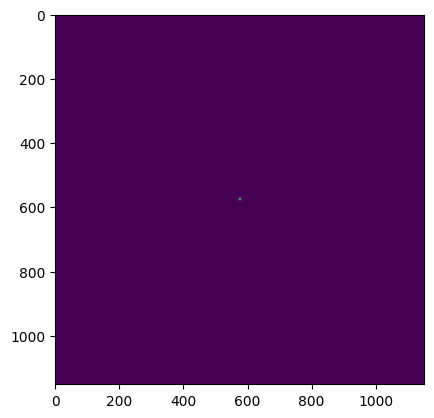


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



100%|██████████| 349/349 [00:08<00:00, 42.27it/s]

Running closed loop with diffractive sensor


In [15]:
from OOPAO.Detector import Detector
SciSrc_cam = Detector(tel.resolution*4)
SciSrc_cam.psf_sampling = 4
SciSrc_cam.integrationTime = tel.samplingTime*1


# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

dm.coefs = 0      # initialize DM commands

# initialize DM commands
SciSrc**atm*tel*dm*SciSrc_cam


nLoop = config_vars["nLoop"]

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
gainCL                  = config_vars["gainCL"]

atm.generateNewPhaseScreen(10)
# Save reference frame 
SciSrc**tel*dm*SciSrc_cam
plt.imshow(SciSrc_cam.frame)
plt.show()
SciSrc_cam.reference_frame = SciSrc_cam.frame.copy()



from tqdm import tqdm

if config_vars["loop_mode"] == 'closed':
    calib_src = Source('Na', 0)

    calib_src**atm
    dm_eye = np.eye(dm.nValidAct)
    imat = np.zeros((shwfs_geom.nValidSubaperture*2, dm.nValidAct)) 
    for i_act in tqdm(range(dm.nValidAct)):
        dm.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
        calib_src**tel*dm*shwfs_geom
        
        wfsSignal = np.hstack(shwfs_geom.signal)
        
        if rec.indexation == "xyxy":
            wfsSignal_xyxy = np.zeros(wfsSignal.shape)
            wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
            wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
            wfsSignal = wfsSignal_xyxy.copy()
            
        # imat[:, i_act] = shwfs_geom.signal
        imat[:, i_act] = wfsSignal

    imat = imat*2*np.pi/calib_src.wavelength    
    imat = np.vstack([imat]*n_lgs)


print(f"Running {config_vars['loop_mode']} loop with {'geometric' if config_vars['wfs_type'] == 'g' else 'diffractive'} sensor")


In [16]:
from IPython.display import display, clear_output


config_vars["display_figures"] = False


if config_vars["display_figures"]:
    fig = plt.figure(figsize=(16, 4))  
    ax1 = fig.add_subplot(1, 4, 1)
    ax2 = fig.add_subplot(1, 4, 2)
    ax3 = fig.add_subplot(1, 4, 3)
    ax4 = fig.add_subplot(1, 4, 4)

for i in range(nLoop):

    atm.update()
    SciSrc**atm*tel

    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


    if config_vars["loop_mode"] == 'open':
        lgsAst**atm*tel*shwfs_geom*dm
        wfsSignal = np.hstack(shwfs_geom.signal)
        
    elif config_vars["loop_mode"] == 'closed':

        if config_vars["wfs_type"] == 'g':
            lgsAst**atm*tel*dm*shwfs_geom
            wfsSignal = np.hstack(shwfs_geom.signal)

        elif config_vars["wfs_type"] == 'd':
            lgsAst**atm*tel*dm*shwfs
            wfsSignal = np.hstack(shwfs.signal)
    
    # wfsSignal = shwfs.signal.copy()
    # wfsSignal=np.hstack(wfsSignal)
    

    if rec.indexation == "xyxy":

        wfsSignal_xyxy = np.zeros(wfsSignal.shape)
        wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
        wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
        wfsSignal = wfsSignal_xyxy.copy()


    if config_vars["loop_mode"] == 'closed':
        wfsSignal = wfsSignal-imat@dm.coefs

    SciSrc**atm*tel*dm*SciSrc_cam

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9

    
    if config_vars["display_figures"]:
        ax1.cla()
        ax1.plot(total[:i], label="Total")
        ax1.plot(residual[:i], label="Residual")
        
        ax1.set_xlim(0, nLoop+5)
        ax1.set_ylabel("AO residual")
        ax1.set_title(f"AO residual over time - {round(residual[i], 2)} nm")
        ax1.legend()
        ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

        ax2.cla()
        ax2.imshow(dm.OPD)
        ax2.axis('off')
        ax2.set_title(f'Deformable Mirror OPD')

        ax3.cla()
        ax3.imshow(SciSrc.OPD)
        ax3.axis('off')
        ax3.set_title(f"SciSrc OPD - AO res {round(residual[i], 2)} nm")
        
        tel.pupilReflectivity = tel.pupil.astype(float)


        zeroPaddingFactor = 6
        tel.computePSF(zeroPaddingFactor=zeroPaddingFactor, detector=SciSrc_cam)

        size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
        N                 = 250
        normalized_PSF    = tel.PSF[N:-N,N:-N]
        fov               = normalized_PSF.shape[0]*size_pixel_arcsec

        ax4.cla()
        ax4.imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
        ax4.axis('off')
        ax4.set_title(f"SciSrc Cam Frame \nMarechal SR: {round(SR[i], 3)}\nmax(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame), 3)}")


        display(fig)
        clear_output(wait = True)
    else:
        print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')


Loop0/1000 AO residual: 1118.2560562099143 nm
Loop1/1000 AO residual: 270.7120715297039 nm
Loop2/1000 AO residual: 152.6175007512293 nm
Loop3/1000 AO residual: 157.1081490509205 nm
Loop4/1000 AO residual: 156.19442888753585 nm
Loop5/1000 AO residual: 150.06805824621296 nm
Loop6/1000 AO residual: 145.21083697327623 nm
Loop7/1000 AO residual: 143.50359988370488 nm
Loop8/1000 AO residual: 145.27244387796205 nm
Loop9/1000 AO residual: 144.18815933398193 nm
Loop10/1000 AO residual: 142.97510984810515 nm
Loop11/1000 AO residual: 140.04078446522652 nm
Loop12/1000 AO residual: 138.44296935255153 nm
Loop13/1000 AO residual: 137.68357172032884 nm
Loop14/1000 AO residual: 135.5915251249328 nm
Loop15/1000 AO residual: 135.94952005755545 nm
Loop16/1000 AO residual: 139.23773119347337 nm
Loop17/1000 AO residual: 146.58526249774118 nm
Loop18/1000 AO residual: 149.9909335141817 nm
Loop19/1000 AO residual: 147.86464066077244 nm
Loop20/1000 AO residual: 146.11915033593473 nm
Loop21/1000 AO residual: 146

In [17]:
# phasesMatlab1_data = loadmat('/home/joaomonteiro/Desktop/temp/phasesMatlab1.mat')
# phasesMatlab1 = np.array(phasesMatlab1_data['phasesMatlab1'])

# phasesMatlab2_data = loadmat('/home/joaomonteiro/Desktop/temp/phasesMatlab2.mat')
# phasesMatlab2 = np.array(phasesMatlab2_data['phasesMatlab2'])

# phasesMatlab3_data = loadmat('/home/joaomonteiro/Desktop/temp/phasesMatlab3.mat')
# phasesMatlab3 = np.array(phasesMatlab3_data['phasesMatlab3'])

# phasesMatlab4_data = loadmat('/home/joaomonteiro/Desktop/temp/phasesMatlab4.mat')
# phasesMatlab4 = np.array(phasesMatlab4_data['phasesMatlab4'])

# phasesMatlab5_data = loadmat('/home/joaomonteiro/Desktop/temp/phasesMatlab5.mat')
# phasesMatlab5 = np.array(phasesMatlab5_data['phasesMatlab5'])



In [18]:
# lgsAst.src[0].phase_no_pupil = phasesMatlab1[0, 0, :, :]

In [19]:
# plt.imshow(phasesMatlab1[0, 0, :, :])

In [20]:
# SciSrc.resetOPD()
# lgsAst.resetOPD()


# SciSrc**atm*tel
# lgsAst**atm*tel


In [21]:



# for i in range(nLoop):

#     # atm.update()
#     SciSrc**atm*tel
#     SciSrc.phase_no_pupil = phasesMatlab5[i, 0, :, :].copy()

#     total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


#     if config_vars["loop_mode"] == 'open':
#         # lgsAst**atm*tel*shwfs_geom*dm
#         lgsAst**atm*tel
#         lgsAst.src[0].phase_no_pupil = phasesMatlab1[i, 0, :, :].copy()
#         lgsAst.src[1].phase_no_pupil = phasesMatlab1[i, 0, :, :].copy()
#         lgsAst.src[2].phase_no_pupil = phasesMatlab1[i, 0, :, :].copy()
#         lgsAst.src[3].phase_no_pupil = phasesMatlab1[i, 0, :, :].copy()
#         lgsAst*shwfs_geom*dm

#         wfsSignal = np.hstack(shwfs_geom.signal)
        
#     elif config_vars["loop_mode"] == 'closed':

#         if config_vars["wfs_type"] == 'g':
#             lgsAst**atm*tel*dm*shwfs_geom
#             wfsSignal = np.hstack(shwfs_geom.signal)

#         elif config_vars["wfs_type"] == 'd':
#             lgsAst**atm*tel*dm*shwfs
#             wfsSignal = np.hstack(shwfs.signal)
    
#     # wfsSignal = shwfs.signal.copy()
#     # wfsSignal=np.hstack(wfsSignal)
    

#     if rec.indexation == "xyxy":

#         wfsSignal_xyxy = np.zeros(wfsSignal.shape)
#         wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
#         wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
#         wfsSignal = wfsSignal_xyxy.copy()


#     if config_vars["loop_mode"] == 'closed':
#         wfsSignal = wfsSignal-imat@dm.coefs

#     SciSrc**atm*tel
#     SciSrc.phase_no_pupil = phasesMatlab5[i, 0, :, :].copy()
#     SciSrc*dm*SciSrc_cam


#     dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

#     SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
#     residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9

    
#     print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')


In [22]:
# Mean AO res 247.88 nm
# Marechal SR: 57.57%
# max(i_ao)/max(i_dl) SR: 60.68%

## Results

In [33]:
print(f"Mean AO res {round(np.mean(residual), 2)} nm")
# print(f"Marechal SR: {round(SR[-1]*100, 2)}%")
print(f"Mean Marechal SR: {round(np.mean(SR)*100, 2)}%")
print(f"max(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}%")


Mean AO res 151.52 nm
Mean Marechal SR: 72.01%
max(i_ao)/max(i_dl) SR: 74.88%


In [24]:
# Mean AO res 151.52 nm
# Mean Marechal SR: 72.01%
# max(i_ao)/max(i_dl) SR: 74.88%

In [25]:
# lgsAst.src[0].magnitude

In [26]:
# atm.r0

In [27]:
# np.sqrt(156**2-100**2)

In [28]:
# Mean AO res 146.46 nm
# Marechal SR: 68.99%
# Mean Marechal SR: 73.58%
# max(i_ao)/max(i_dl) SR: 74.7%

In [29]:
# lgsAst.src[3].type

In [30]:
# gCL xxyy 1000


# dCL xyxy 10000
# Mean AO res 256.39 nm
# Marechal SR: 48.15%
# max(i_ao)/max(i_dl) SR: 59.74%

# dCL xxyy 10000
# Mean AO res 256.39 nm
# Marechal SR: 48.15%
# max(i_ao)/max(i_dl) SR: 59.74%




# gCL xyxy 1000


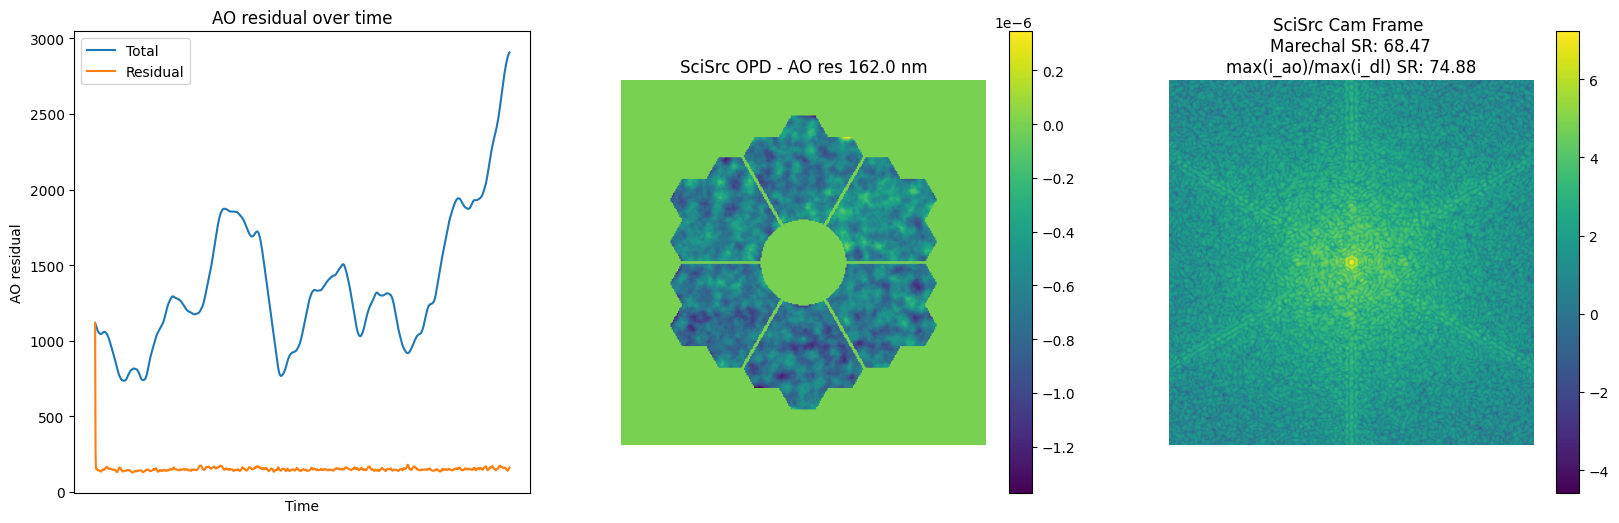

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].plot(total, label="Total")
axes[0].plot(residual, label="Residual")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("AO residual")
axes[0].set_title("AO residual over time")
axes[0].legend()
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


im = axes[1].imshow(SciSrc.OPD)
axes[1].axis('off')
axes[1].set_title(f"SciSrc OPD - AO res {round(residual[-1], 2)} nm")
fig.colorbar(im, ax=axes[1])


# set back the reflectivity 1
tel.pupilReflectivity = tel.pupil.astype(float)

SciSrc**atm*tel*dm 
# SciSrc.phase_no_pupil = phasesMatlab5[i, 0, :, :]
# SciSrc*dm 

# compute PSF method
zeroPaddingFactor = 6
tel.computePSF(zeroPaddingFactor=zeroPaddingFactor, detector=SciSrc_cam)

# get current pixel scale
size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
N                 = 250
normalized_PSF    = tel.PSF[N:-N,N:-N]# crop to zoom on the center
fov               = normalized_PSF.shape[0]*size_pixel_arcsec # get the corresponding fov


im = axes[2].imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
axes[2].axis('off')
axes[2].set_title(f"SciSrc Cam Frame \nMarechal SR: {round(SR[-1]*100, 2)}\nmax(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}")
fig.colorbar(im, ax=axes[2])



In [32]:
stop

NameError: name 'stop' is not defined

In [ ]:
residualMatlab_data = loadmat('/home/joaomonteiro/Desktop/temp/rmsMatlab_dCL.mat')
residualMatlab = residualMatlab_data['rms_list'].flatten()

In [ ]:
savemat(f'/home/joaomonteiro/Desktop/temp/rmsPython_dCL.mat',
    {'rms_list': residual})

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(residualMatlab[-500:], label="Matlab")
plt.plot(residual[-500:], label="Python")
plt.xlabel("Time")
plt.ylabel("AO residual")
plt.title("AO residual over time")
plt.legend()
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xticks(np.arange(0, 500, 100))

In [ ]:
np.arange(500, 1000)

In [ ]:
if n_lgs == 4:
    wfs_frame = np.vstack([np.hstack([shwfs.frames[0], shwfs.frames[1]]),
                        np.hstack([shwfs.frames[2], shwfs.frames[3]])])

    plt.imshow(wfs_frame)
    plt.colorbar()